# import packages

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

import pandas as pd
import numpy as np

# load data

In [88]:
train_x = pd.read_csv("train_x.csv",index_col=["cust_group","cust_id"])
train_x = train_x.replace(-99,np.nan)

# remove unnecessary variables or observations

## compute the missing rate
### col missing rate

In [89]:
col_missing_rate =train_x.apply(lambda x:(len(x)-x.count())/len(x))
col_missing_rate.name="col_missing_rate"
col_missing_rate09 = col_missing_rate[col_missing_rate>0.8]
col_missing_rate09

x_92     0.9652
x_94     0.9652
x_102    0.9999
x_103    0.9999
x_104    0.9987
x_105    0.9983
x_106    0.9995
x_107    0.9883
x_108    0.9999
x_109    0.9999
x_110    0.9995
x_111    0.9999
x_112    0.9998
x_113    0.9976
x_114    1.0000
x_115    0.9998
x_116    0.9922
x_117    0.9998
x_118    0.9994
x_119    0.9996
x_120    0.9997
x_121    0.9975
x_122    0.9990
x_123    0.9984
x_124    0.9993
x_125    0.9887
x_126    1.0000
x_127    0.9999
x_128    0.9999
x_129    0.9995
x_130    1.0000
x_131    0.9996
x_132    0.9975
x_133    0.9999
x_134    0.9928
x_135    0.9999
x_136    0.9996
x_137    0.9997
x_138    1.0000
Name: col_missing_rate, dtype: float64

### plot_numeric_col_missing_rate

In [ ]:
numeric_col_missing_rate = col_missing_rate.loc["x_1":"x_95"]

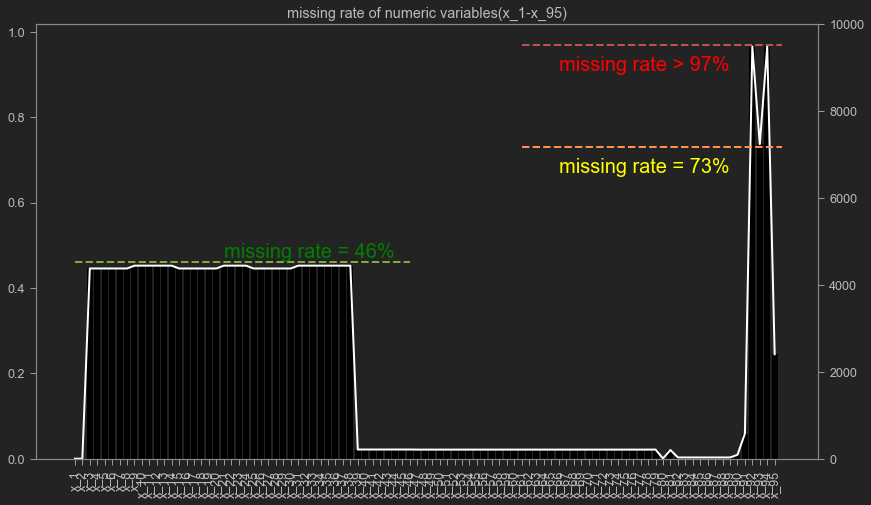

In [90]:
figure,ax = plt.subplots(figsize=(14,8))
ax.bar(numeric_col_missing_rate.index,numeric_col_missing_rate,color="black")

ax.plot(numeric_col_missing_rate,color="white",linewidth=2)

ax.plot((0.0,45),(0.46,0.46),"g--",linewidth=2)
ax.annotate("missing rate = 46%",xy=(20,0.46),xytext=(20,0.47),color="green",fontsize=20)

ax.plot((60,95),(0.73,0.73),"y--",linewidth=2)
ax.annotate("missing rate = 73%",xy=(70,0.7),xytext=(65,0.67),color="yellow",fontsize=20)

ax.plot((60,95),(0.97,0.97),"r--",linewidth=2)
ax.annotate("missing rate > 97%",xy=(70,0.97),xytext=(65,0.91),color="red",fontsize=20)

ax.set_title("missing rate of numeric variables(x_1-x_95)")
ax_ = ax.twinx()
ax_.set_ylim(0,10000)
for xlabel in ax.get_xticklabels():
    xlabel.set_rotation(90)

### plot_category_col_missing_rate

In [ ]:
category_col_missing_rate = col_missing_rate.loc["x_96":"x_157"]

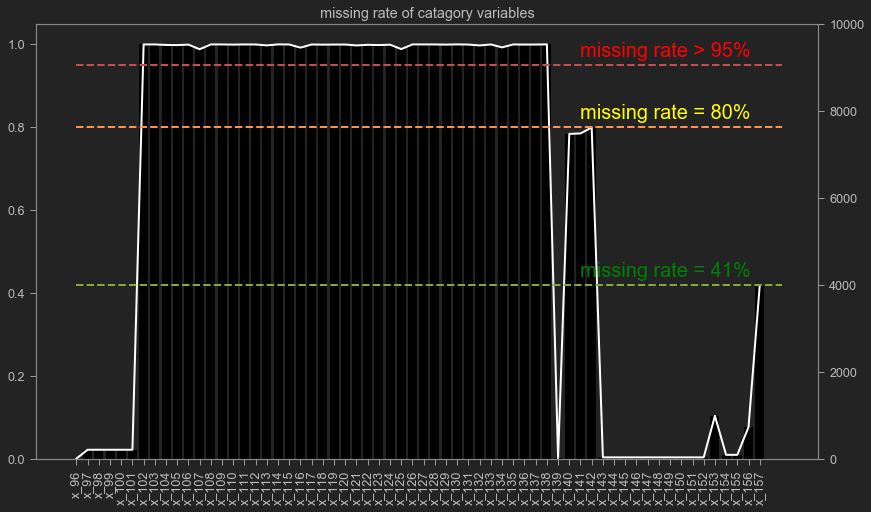

In [91]:
figure,ax = plt.subplots(figsize=(14,8))
ax.bar(category_col_missing_rate.index,category_col_missing_rate,color="black")

ax.plot(category_col_missing_rate,color="white",linewidth=2)

ax.plot((0.0,63),(0.95,0.95),"r--",linewidth=2)
ax.annotate(s="missing rate > 95%",xy=(45,0.95),xytext=(45,0.97),color="red",fontsize=20)

ax.plot((0.0,63),(0.80,0.80),"y--",linewidth=2)
ax.annotate("missing rate = 80%",xy=(45,0.80),xytext=(45,0.82),color="yellow",fontsize=20)

ax.plot((0.0,63),(0.42,0.42),"g--",linewidth=2)
ax.annotate("missing rate = 41%",xy=(45,0.42),xytext=(45,0.44),color="green",fontsize=20)

ax.set_title("missing rate of catagory variables")
ax_ = ax.twinx()
ax_.set_ylim(0,10000)
for xlabel in ax.get_xticklabels():
    xlabel.set_rotation(90)

In [92]:
train_x.drop(col_missing_rate09.index,axis=1,inplace=True)

### row missing rate

In [93]:
row_missing_rate = pd.Series(train_x.T.apply(lambda x: (len(x)-x.count())/len(x)),name="row_missing_rate")
row_drop = row_missing_rate[row_missing_rate>0.73]
row_drop

cust_group  cust_id
group_3     100081     0.745763
            100136     0.737288
            100151     0.754237
            100158     0.754237
            100299     0.737288
            100342     0.754237
            100446     0.745763
            100498     0.745763
            100503     0.754237
            100622     0.737288
            100689     0.737288
            100710     0.762712
            100789     0.754237
            100880     0.754237
            100910     0.737288
            100983     0.737288
            100988     0.745763
            101013     0.754237
            101054     0.737288
            101074     0.745763
            101151     0.754237
            101180     0.754237
            101361     0.779661
            101400     0.745763
            101464     0.737288
            101599     0.745763
            101600     0.754237
            101617     0.737288
            101660     0.737288
            101673     0.762712
            101703  

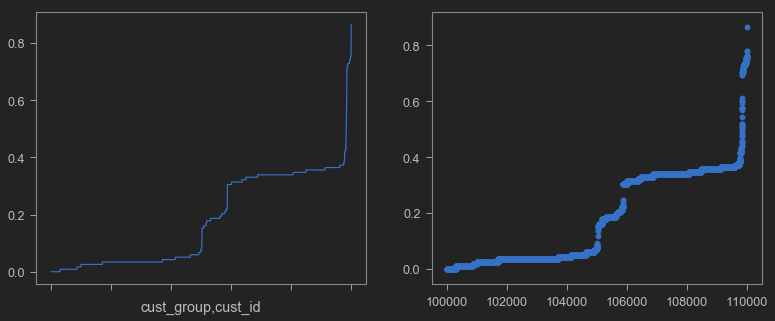

In [94]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
row_missing_rate.sort_values().plot()
plt.subplot(1,2,2)
plt.scatter(row_missing_rate.index.get_level_values(level=1),row_missing_rate.sort_values())

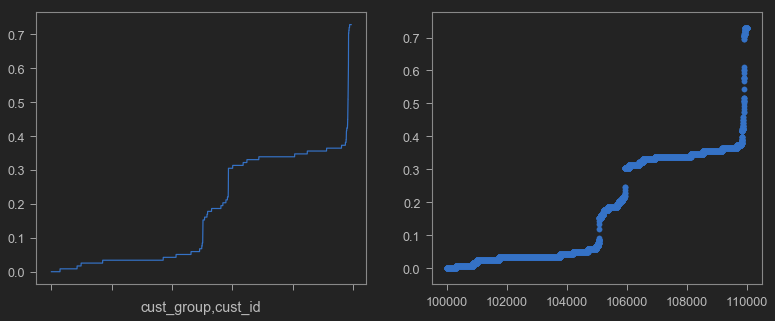

In [95]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
row_missing_rate[row_missing_rate<=0.73].sort_values().plot()
row_missing_rate073 = row_missing_rate[row_missing_rate<=0.73]
plt.subplot(1,2,2)
plt.scatter(row_missing_rate073.index.get_level_values(level=1),row_missing_rate073.sort_values())

In [10]:
train_x.drop(index=row_drop.index,axis=0,inplace=True)

## view the distribution
### numeric var-discretize

In [ ]:
numeric_var = train_x.loc[:,"x_1":"x_95"].fillna(-1)

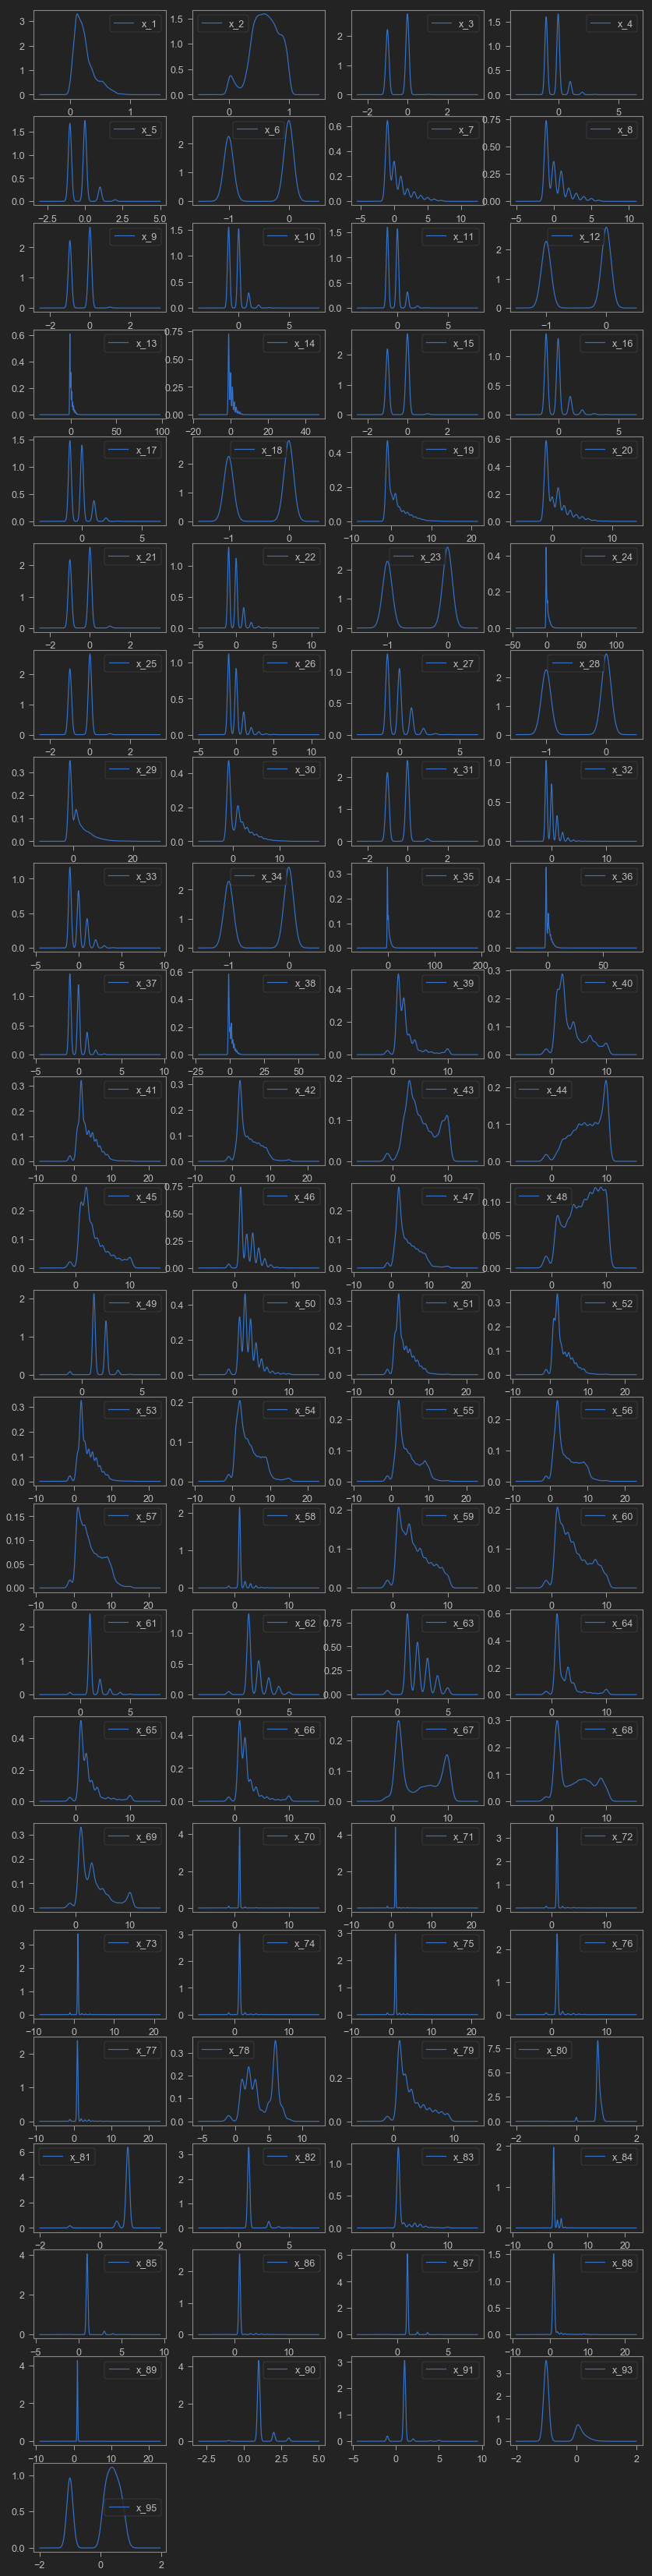

In [96]:
ncol = 4
nrow = (len(numeric_var.columns) // ncol)+1
figure = plt.figure(figsize=(14,60))
for i in range(len(numeric_var.columns)):
    ax = plt.subplot(nrow,ncol,i+1)
    numeric_var.iloc[:,i].plot(kind="kde",ax=ax)
    ax.set_ylabel("")
    ax.legend([str(numeric_var.columns[i])],loc="best")
plt.savefig("./plots/train_data_nolabel.png")

In [97]:
def discrete_detect(col_list):
    for col in col_list:
        val_count = numeric_var[col].value_counts()
        print(val_count)
        val_count.plot(kind="bar")
        plt.title(col)
        plt.show()

 0.0    5518
-1.0    4455
 1.0      24
 2.0       3
Name: x_3, dtype: int64


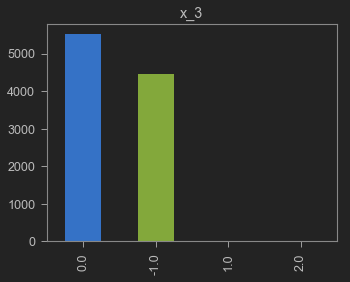

 0.0    4626
-1.0    4455
 1.0     755
 2.0     142
 3.0      20
 4.0       2
Name: x_4, dtype: int64


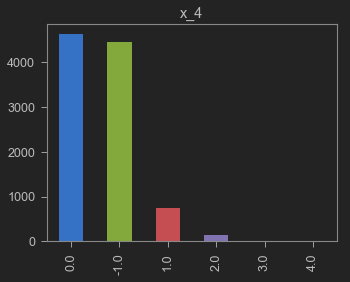

 0.0    4626
-1.0    4455
 1.0     824
 2.0      92
 3.0       3
Name: x_5, dtype: int64


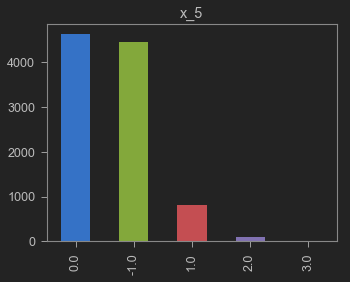

 0.0    5545
-1.0    4455
Name: x_6, dtype: int64


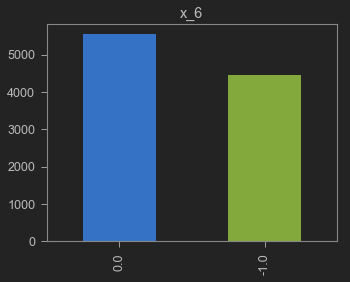

-1.0    4455
 0.0    2202
 1.0    1391
 2.0     695
 3.0     533
 4.0     329
 5.0     216
 6.0     124
 7.0      54
 8.0       1
Name: x_7, dtype: int64


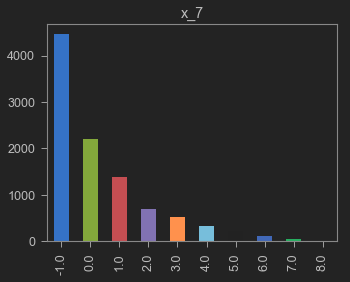

-1.0    4455
 0.0    2202
 1.0    1671
 2.0     733
 3.0     450
 4.0     263
 5.0     163
 6.0      62
 7.0       1
Name: x_8, dtype: int64


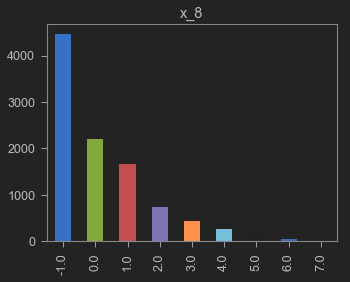

 0.0    5415
-1.0    4521
 1.0      62
 2.0       2
Name: x_9, dtype: int64


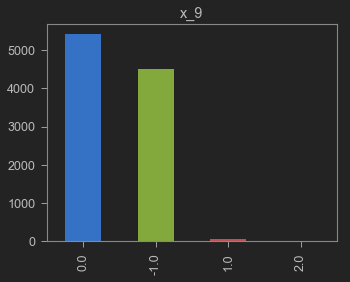

-1.0    4521
 0.0    4429
 1.0     844
 2.0     169
 3.0      29
 4.0       6
 5.0       2
Name: x_10, dtype: int64


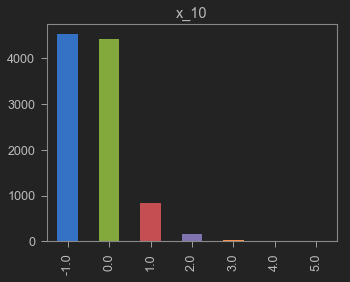

-1.0    4521
 0.0    4429
 1.0     904
 2.0     127
 3.0      16
 4.0       2
 5.0       1
Name: x_11, dtype: int64


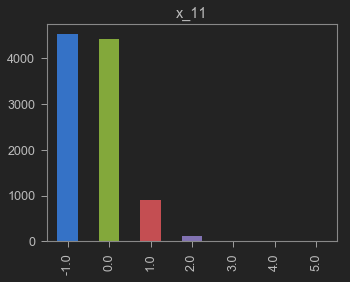

 0.0    5479
-1.0    4521
Name: x_12, dtype: int64


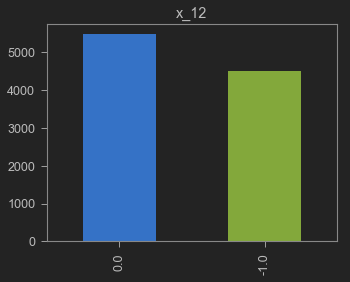

-1.0     4521
 0.0     2357
 1.0     1297
 2.0      695
 3.0      494
 4.0      283
 5.0      184
 6.0       95
 7.0       47
 8.0        5
 9.0        5
 15.0       4
 11.0       4
 14.0       3
 10.0       3
 12.0       1
 17.0       1
 65.0       1
Name: x_13, dtype: int64


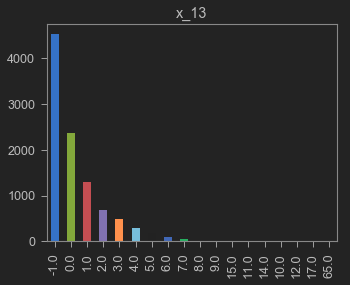

-1.0     4521
 0.0     2357
 1.0     1543
 2.0      716
 3.0      431
 4.0      217
 5.0      145
 6.0       44
 7.0        9
 10.0       6
 9.0        4
 14.0       2
 8.0        2
 31.0       1
 13.0       1
 12.0       1
Name: x_14, dtype: int64


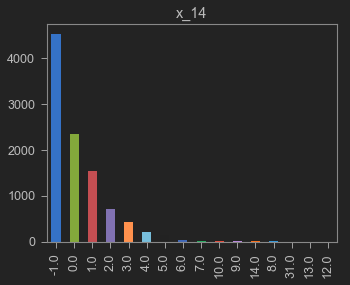

 0.0    5475
-1.0    4455
 1.0      67
 2.0       3
Name: x_15, dtype: int64


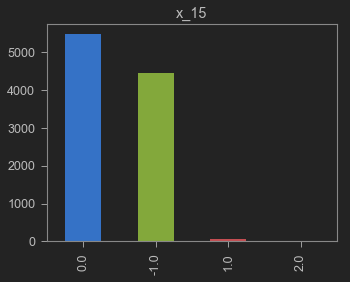

-1.0    4455
 0.0    4197
 1.0    1005
 2.0     267
 3.0      61
 4.0      15
Name: x_16, dtype: int64


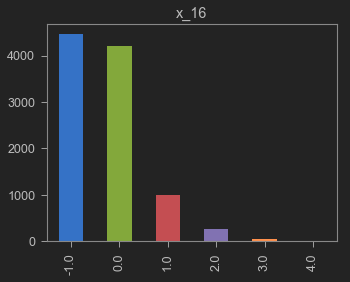

-1.0    4455
 0.0    4197
 1.0    1138
 2.0     192
 3.0      17
 4.0       1
Name: x_17, dtype: int64


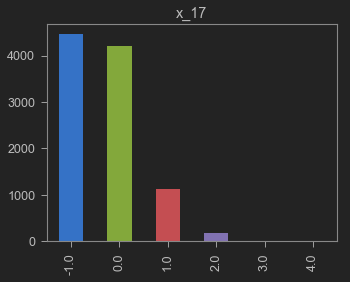

 0.0    5545
-1.0    4455
Name: x_18, dtype: int64


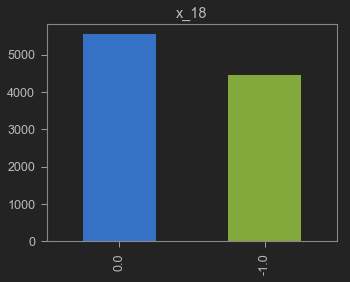

-1.0     4455
 1.0     1490
 0.0     1328
 2.0      734
 3.0      558
 4.0      479
 5.0      346
 6.0      235
 7.0      158
 8.0       98
 9.0       43
 10.0      32
 11.0      23
 12.0      16
 13.0       4
 14.0       1
Name: x_19, dtype: int64


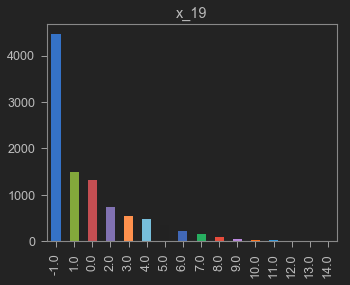

-1.0    4455
 1.0    1848
 0.0    1328
 2.0     865
 3.0     603
 4.0     376
 5.0     270
 6.0     149
 7.0      68
 8.0      23
 9.0      15
Name: x_20, dtype: int64


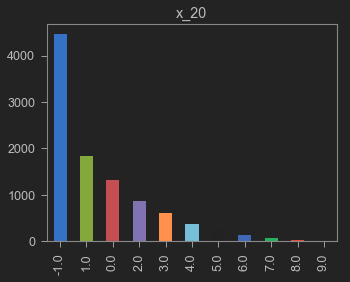

 0.0    5352
-1.0    4521
 1.0     125
 2.0       2
Name: x_21, dtype: int64


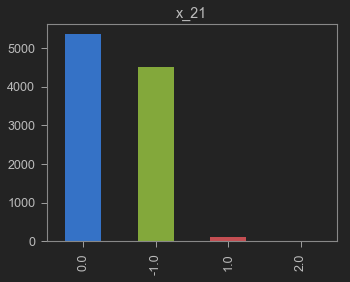

-1.0    4521
 0.0    3907
 1.0    1141
 2.0     314
 3.0      88
 4.0      22
 5.0       5
 7.0       1
 6.0       1
Name: x_22, dtype: int64


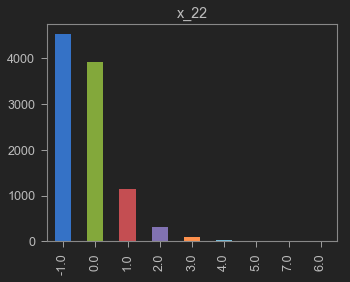

 0.0    5479
-1.0    4521
Name: x_23, dtype: int64


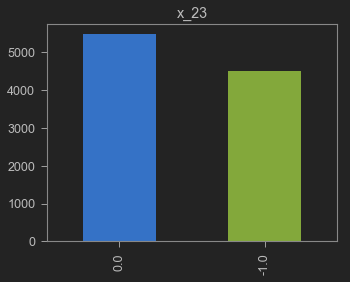

-1.0     4521
 0.0     1502
 1.0     1451
 2.0      726
 3.0      567
 4.0      410
 5.0      309
 6.0      190
 7.0      122
 8.0       74
 9.0       36
 10.0      31
 11.0      20
 12.0      13
 14.0       5
 15.0       5
 17.0       3
 16.0       3
 19.0       2
 13.0       2
 20.0       2
 23.0       1
 28.0       1
 86.0       1
 21.0       1
 18.0       1
 32.0       1
Name: x_24, dtype: int64


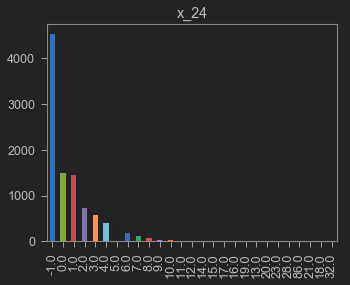

 0.0    5471
-1.0    4455
 1.0      70
 2.0       4
Name: x_25, dtype: int64


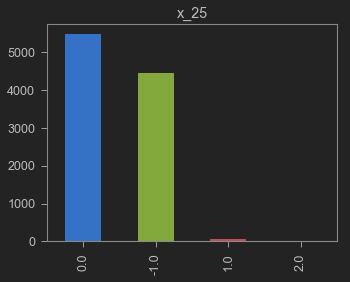

-1.0    4455
 0.0    3649
 1.0    1254
 2.0     404
 3.0     165
 4.0      54
 5.0      17
 6.0       1
 7.0       1
Name: x_26, dtype: int64


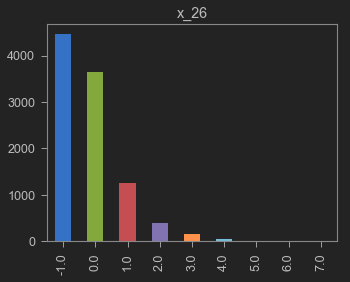

-1.0    4455
 0.0    3649
 1.0    1479
 2.0     345
 3.0      64
 4.0       8
Name: x_27, dtype: int64


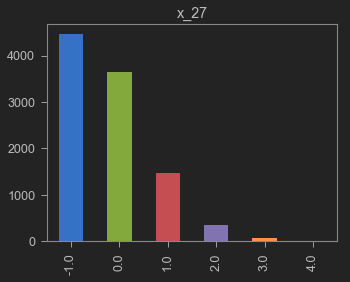

 0.0    5545
-1.0    4455
Name: x_28, dtype: int64


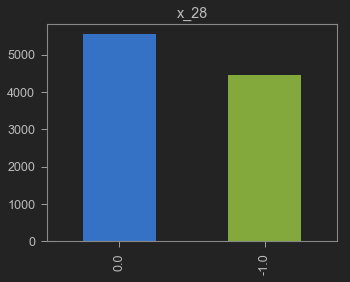

-1.0     4455
 1.0     1588
 2.0      804
 3.0      633
 0.0      465
 4.0      463
 5.0      418
 6.0      335
 7.0      229
 8.0      164
 9.0      126
 10.0      93
 11.0      78
 12.0      37
 13.0      35
 14.0      21
 15.0      18
 17.0      12
 16.0      11
 19.0       8
 18.0       7
Name: x_29, dtype: int64


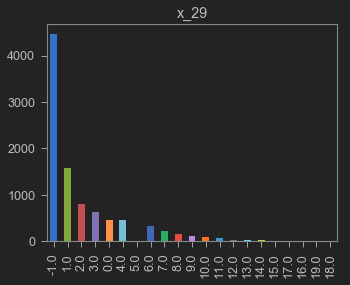

-1.0     4455
 1.0     1934
 2.0      999
 3.0      732
 4.0      477
 0.0      465
 5.0      369
 6.0      247
 7.0      138
 8.0       82
 9.0       44
 10.0      29
 11.0      20
 12.0       9
Name: x_30, dtype: int64


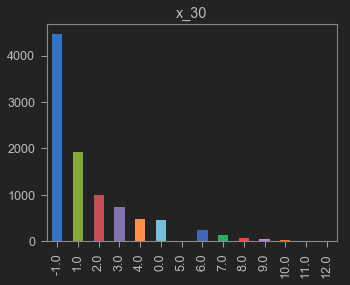

 0.0    5298
-1.0    4521
 1.0     175
 2.0       6
Name: x_31, dtype: int64


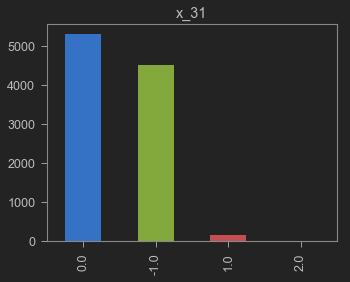

-1.0     4521
 0.0     3209
 1.0     1441
 2.0      506
 3.0      198
 4.0       77
 5.0       33
 6.0       11
 7.0        2
 8.0        1
 10.0       1
Name: x_32, dtype: int64


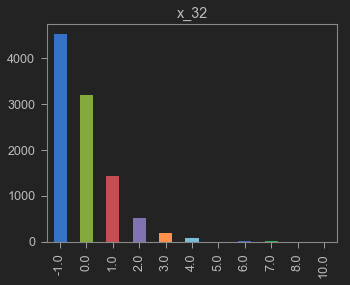

-1.0    4521
 0.0    3209
 1.0    1647
 2.0     463
 3.0     133
 4.0      23
 5.0       3
 6.0       1
Name: x_33, dtype: int64


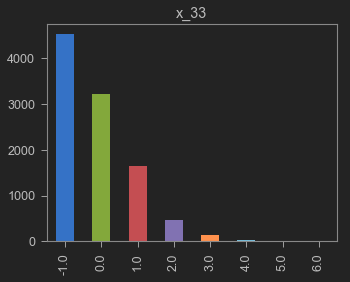

 0.0    5479
-1.0    4521
Name: x_34, dtype: int64


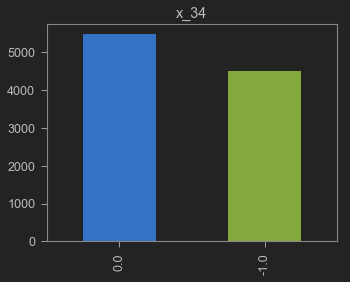

-1.0      4521
 1.0      1567
 2.0       826
 0.0       657
 3.0       618
 4.0       442
 5.0       359
 6.0       279
 7.0       209
 8.0       133
 9.0       106
 10.0       80
 11.0       67
 12.0       29
 13.0       21
 17.0       19
 14.0       19
 15.0       11
 16.0        8
 19.0        6
 18.0        4
 21.0        3
 22.0        2
 53.0        2
 20.0        2
 55.0        1
 32.0        1
 27.0        1
 128.0       1
 33.0        1
 23.0        1
 29.0        1
 35.0        1
 25.0        1
 48.0        1
Name: x_35, dtype: int64


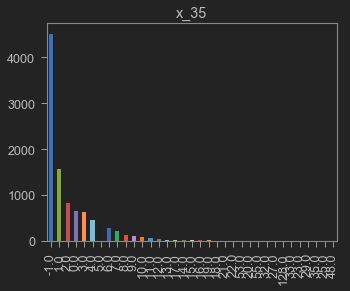

-1.0     4521
 1.0     1896
 2.0      985
 3.0      693
 0.0      657
 4.0      462
 5.0      304
 6.0      200
 7.0      117
 8.0       59
 9.0       38
 10.0      24
 11.0      17
 12.0       6
 13.0       4
 15.0       3
 17.0       2
 14.0       2
 20.0       2
 16.0       2
 27.0       1
 21.0       1
 29.0       1
 22.0       1
 18.0       1
 53.0       1
Name: x_36, dtype: int64


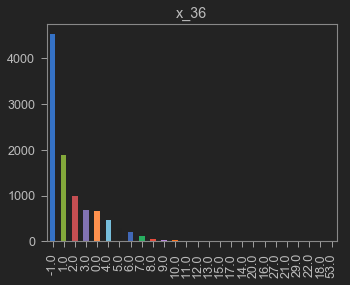

-1.0    4521
 0.0    3907
 1.0    1254
 2.0     265
 3.0      45
 4.0       5
 5.0       2
 6.0       1
Name: x_37, dtype: int64


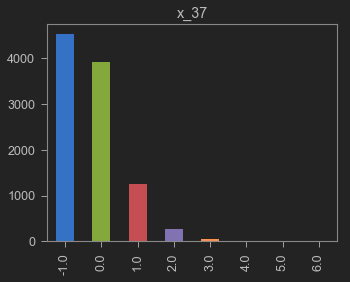

-1.0     4521
 1.0     1766
 0.0     1502
 2.0      824
 3.0      610
 4.0      336
 5.0      227
 6.0      101
 7.0       57
 8.0       18
 9.0       14
 11.0       7
 10.0       5
 13.0       4
 15.0       3
 16.0       2
 14.0       1
 12.0       1
 43.0       1
Name: x_38, dtype: int64


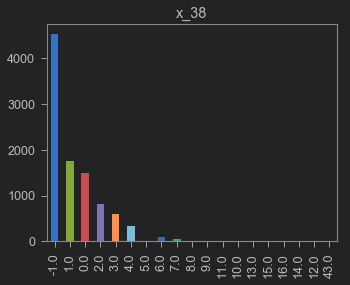

 1.0     4110
 2.0     2853
 3.0      999
 4.0      748
 10.0     301
 6.0      236
-1.0      215
 5.0      200
 7.0      149
 9.0      105
 8.0       84
Name: x_39, dtype: int64


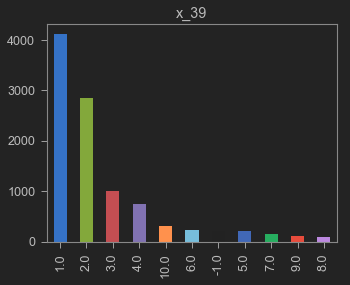

 2.0     2865
 1.0     2236
 4.0     1167
 3.0      832
 7.0      684
 5.0      474
 6.0      426
 8.0      420
 10.0     419
 9.0      262
-1.0      215
Name: x_40, dtype: int64


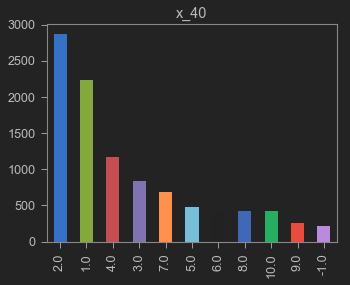

 2.0     3018
 3.0     1316
 1.0     1204
 4.0     1101
 5.0     1042
 6.0      788
 7.0      554
 8.0      341
 9.0      246
-1.0      215
 10.0      73
 11.0      42
 13.0      20
 15.0      15
 12.0      15
 14.0      10
Name: x_41, dtype: int64


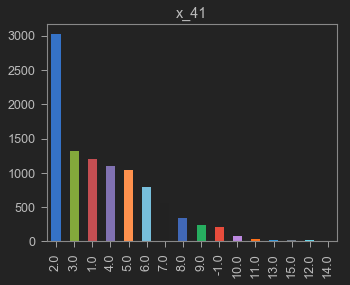

 2.0     3457
 3.0     1032
 4.0      945
 5.0      834
 6.0      719
 7.0      701
 8.0      580
 1.0      540
 9.0      530
 10.0     225
-1.0      215
 15.0      68
 11.0      55
 12.0      46
 14.0      30
 13.0      23
Name: x_42, dtype: int64


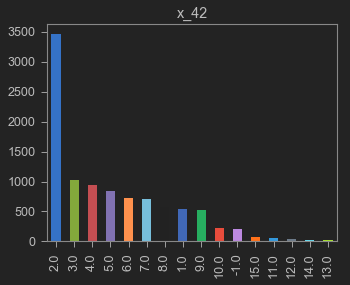

 3.0     1990
 4.0     1374
 10.0    1146
 5.0     1036
 2.0     1008
 9.0      940
 6.0      870
 7.0      674
 8.0      552
-1.0      215
 1.0      195
Name: x_43, dtype: int64


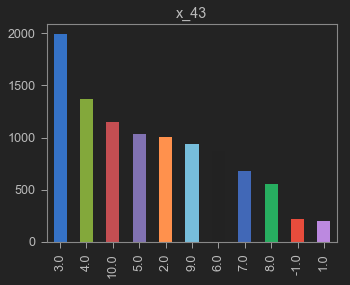

 10.0    2427
 9.0     1049
 6.0     1024
 8.0     1024
 5.0      993
 7.0      963
 4.0      800
 3.0      666
 2.0      598
 1.0      241
-1.0      215
Name: x_44, dtype: int64


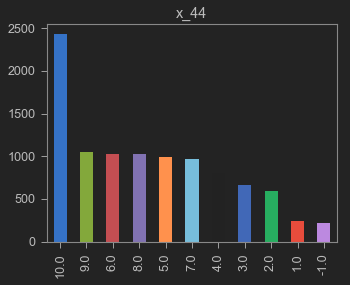

 2.0     2668
 1.0     2165
 3.0     1384
 4.0      958
 5.0      721
 6.0      525
 7.0      419
 10.0     359
 8.0      311
 9.0      275
-1.0      215
Name: x_45, dtype: int64


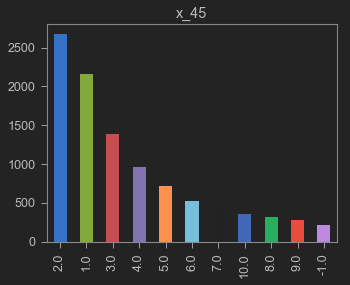

 1.0    4301
 3.0    1871
 2.0    1805
 4.0    1069
 5.0     500
-1.0     215
 6.0     173
 7.0      46
 8.0      17
 9.0       3
Name: x_46, dtype: int64


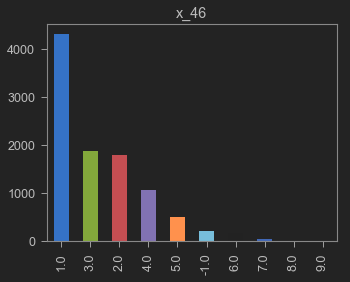

 2.0     3070
 3.0     1180
 4.0      968
 5.0      835
 1.0      817
 6.0      735
 7.0      643
 8.0      543
 9.0      510
 10.0     239
-1.0      213
 15.0      71
 11.0      55
 12.0      53
 14.0      37
 13.0      31
Name: x_47, dtype: int64


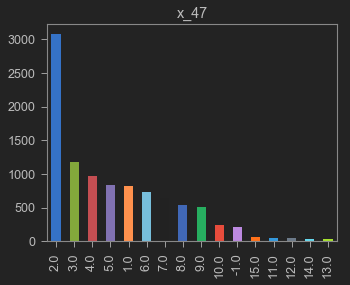

 10.0    1232
 8.0     1200
 9.0     1193
 7.0     1120
 6.0     1017
 4.0      969
 5.0      899
 1.0      869
 3.0      708
 2.0      580
-1.0      213
Name: x_48, dtype: int64


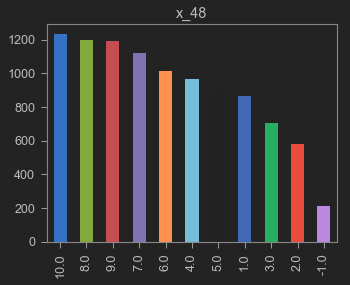

 1.0    5673
 2.0    3768
 3.0     309
-1.0     213
 4.0      30
 0.0       7
Name: x_49, dtype: int64


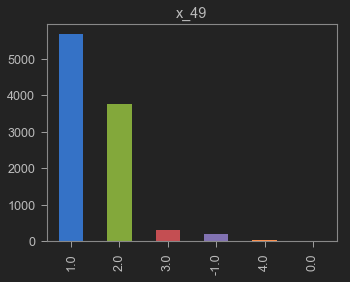

 2.0     3066
 1.0     2197
 3.0     2122
 4.0     1213
 5.0      602
 6.0      283
-1.0      213
 7.0      136
 8.0       75
 9.0       53
 10.0      40
Name: x_50, dtype: int64


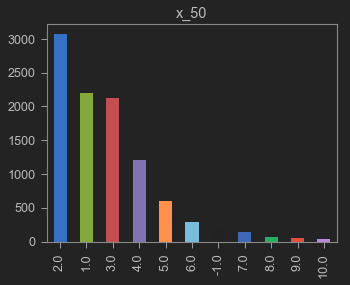

 2.0     3092
 1.0     1530
 3.0     1231
 4.0     1048
 5.0      946
 6.0      687
 7.0      538
 8.0      311
 9.0      228
-1.0      213
 10.0      66
 11.0      42
 12.0      23
 15.0      22
 13.0      14
 14.0       9
Name: x_51, dtype: int64


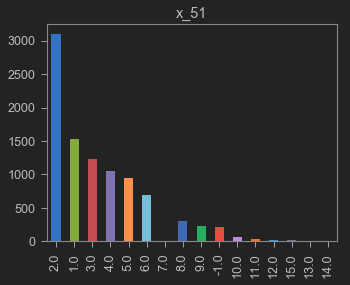

 2.0     3139
 1.0     2129
 3.0     1108
 4.0      841
 5.0      837
 6.0      628
 7.0      438
 8.0      264
 9.0      224
-1.0      213
 10.0      66
 11.0      43
 15.0      23
 12.0      23
 13.0      15
 14.0       9
Name: x_52, dtype: int64


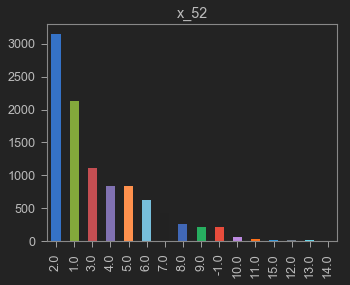

 2.0     3016
 3.0     1396
 4.0     1157
 5.0     1067
 1.0      986
 6.0      852
 7.0      560
 8.0      346
 9.0      244
-1.0      213
 10.0      71
 11.0      39
 12.0      19
 13.0      13
 15.0      13
 14.0       8
Name: x_53, dtype: int64


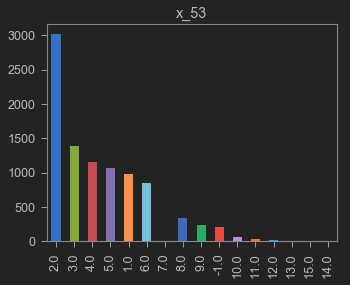

 2.0     2167
 1.0     1520
 3.0     1155
 4.0     1057
 5.0      879
 6.0      658
 9.0      638
 7.0      619
 8.0      601
-1.0      213
 10.0     204
 15.0      90
 11.0      67
 12.0      50
 14.0      50
 13.0      32
Name: x_54, dtype: int64


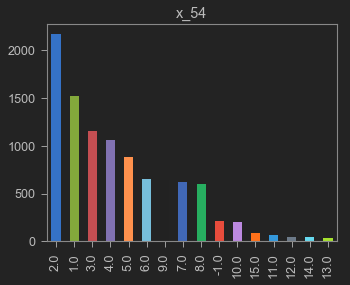

 2.0     2891
 3.0     1151
 4.0     1030
 5.0      878
 1.0      781
 9.0      684
 6.0      633
 7.0      536
 8.0      524
 10.0     462
-1.0      213
 11.0     105
 12.0      52
 15.0      26
 13.0      20
 14.0      14
Name: x_55, dtype: int64


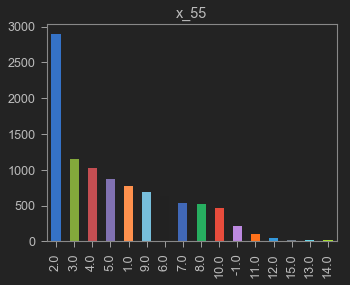

 2.0     2952
 1.0     1132
 3.0      999
 4.0      808
 5.0      727
 9.0      639
 7.0      611
 6.0      596
 8.0      578
 10.0     494
-1.0      213
 11.0     107
 12.0      68
 13.0      31
 15.0      28
 14.0      17
Name: x_56, dtype: int64


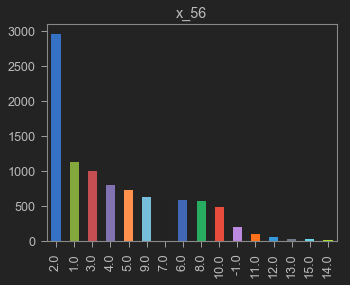

 1.0     1916
 3.0     1335
 2.0     1309
 4.0     1012
 5.0      761
 6.0      705
 9.0      671
 7.0      637
 8.0      627
 10.0     464
-1.0      213
 11.0     159
 12.0      84
 13.0      41
 15.0      39
 14.0      27
Name: x_57, dtype: int64


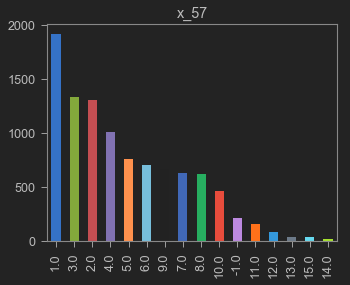

 1.0     8260
 2.0      672
 3.0      457
 4.0      227
-1.0      213
 5.0       86
 6.0       41
 7.0       18
 9.0       11
 8.0        9
 10.0       6
Name: x_58, dtype: int64


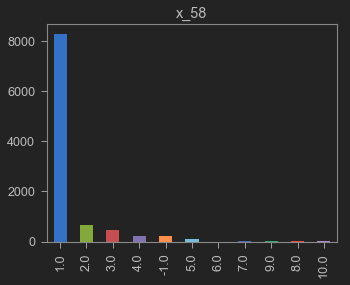

 1.0     2139
 3.0     1619
 2.0     1299
 4.0      997
 5.0      980
 6.0      724
 7.0      616
 8.0      582
 9.0      506
 10.0     325
-1.0      213
Name: x_59, dtype: int64


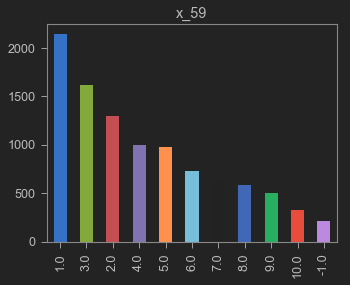

 1.0     2139
 2.0     1502
 3.0     1359
 4.0     1121
 5.0      803
 8.0      716
 6.0      680
 7.0      585
 9.0      549
 10.0     333
-1.0      213
Name: x_60, dtype: int64


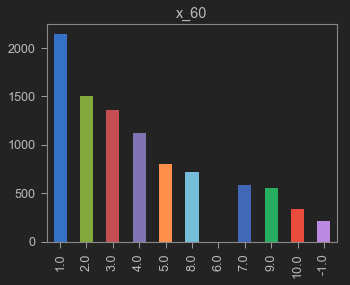

 1.0    7538
 2.0    1443
 3.0     536
 4.0     217
-1.0     213
 5.0      53
Name: x_61, dtype: int64


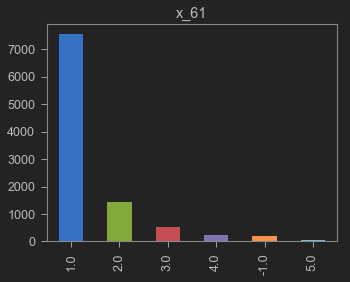

 1.0    5547
 2.0    2332
 3.0    1160
 4.0     570
-1.0     213
 5.0     178
Name: x_62, dtype: int64


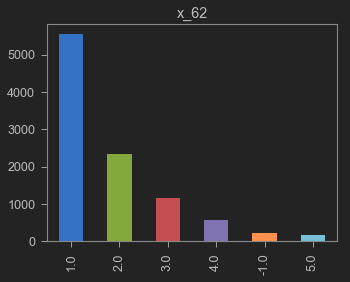

 1.0    4044
 2.0    2619
 3.0    1824
 4.0     954
 5.0     346
-1.0     213
Name: x_63, dtype: int64


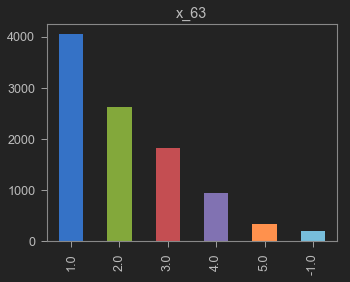

 1.0     5261
 3.0     1774
 2.0      956
 4.0      740
 10.0     345
-1.0      213
 6.0      211
 5.0      174
 7.0      138
 8.0       95
 9.0       93
Name: x_64, dtype: int64


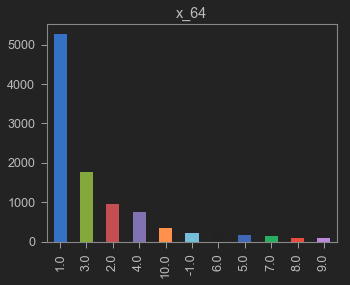

 1.0     4358
 2.0     2529
 3.0     1091
 4.0      742
 10.0     322
-1.0      213
 6.0      205
 5.0      184
 7.0      160
 8.0      105
 9.0       91
Name: x_65, dtype: int64


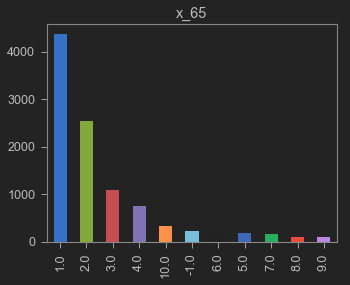

 1.0     3922
 2.0     3081
 3.0     1033
 4.0      690
 5.0      278
 10.0     264
 6.0      216
-1.0      213
 7.0      131
 8.0       91
 9.0       81
Name: x_66, dtype: int64


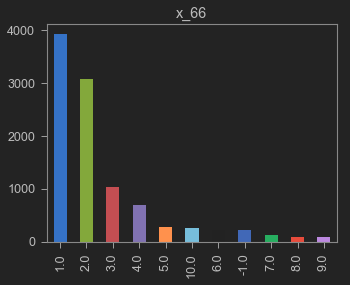

 1.0     3924
 10.0    2124
 9.0      717
 7.0      559
 2.0      489
 5.0      486
 6.0      484
 8.0      426
 3.0      324
 4.0      254
-1.0      213
Name: x_67, dtype: int64


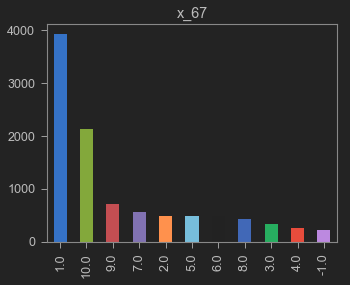

 1.0     3750
 9.0      949
 6.0      840
 5.0      792
 7.0      742
 4.0      647
 3.0      561
 10.0     524
 8.0      501
 2.0      481
-1.0      213
Name: x_68, dtype: int64


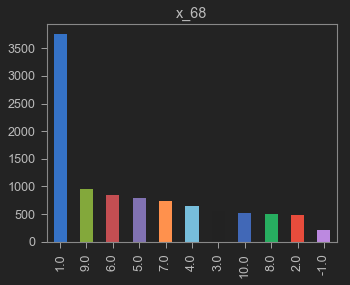

 1.0     3540
 3.0     1885
 2.0      932
 4.0      823
 5.0      768
 10.0     677
 6.0      499
 7.0      242
 9.0      219
-1.0      213
 8.0      202
Name: x_69, dtype: int64


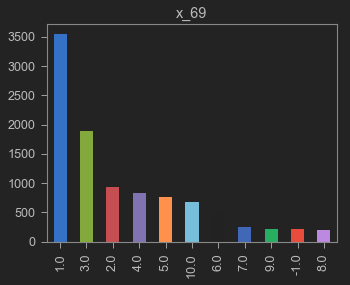

 1.0     9553
-1.0      213
 2.0      125
 4.0       41
 3.0       27
 5.0       16
 7.0        7
 10.0       7
 6.0        6
 9.0        4
 8.0        1
Name: x_70, dtype: int64


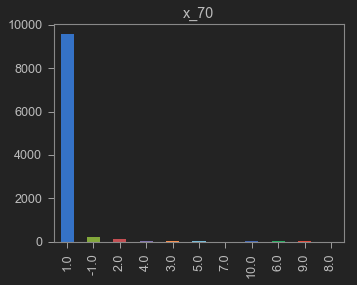

 1.0     9553
-1.0      213
 2.0       81
 4.0       57
 3.0       57
 5.0       16
 6.0       10
 7.0        8
 8.0        2
 9.0        1
 12.0       1
 14.0       1
Name: x_71, dtype: int64


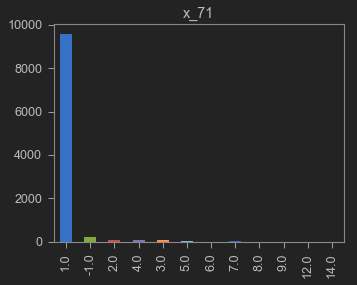

 1.0     9395
-1.0      213
 2.0      190
 4.0       67
 3.0       57
 5.0       28
 6.0       18
 9.0        9
 7.0        8
 10.0       8
 8.0        7
Name: x_72, dtype: int64


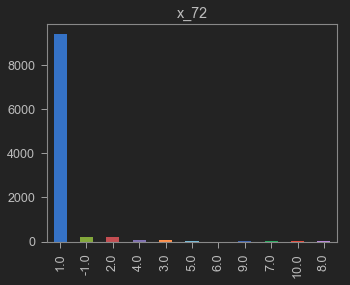

 1.0     9395
-1.0      213
 2.0      131
 4.0       91
 3.0       88
 5.0       36
 7.0       20
 6.0       15
 8.0        6
 9.0        3
 12.0       1
 14.0       1
Name: x_73, dtype: int64


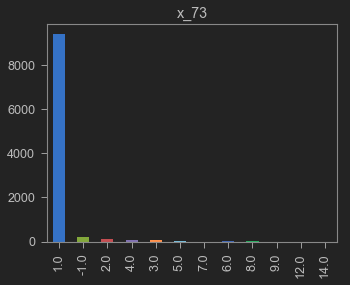

 1.0     9263
 2.0      237
-1.0      213
 4.0       96
 3.0       80
 5.0       43
 6.0       26
 7.0       14
 10.0      12
 9.0        9
 8.0        7
Name: x_74, dtype: int64


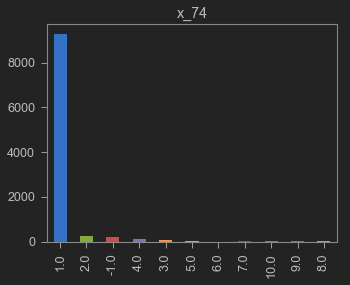

 1.0     9263
-1.0      213
 2.0      175
 4.0      122
 3.0      117
 5.0       42
 7.0       26
 6.0       19
 8.0       11
 9.0        7
 10.0       2
 12.0       2
 14.0       1
Name: x_75, dtype: int64


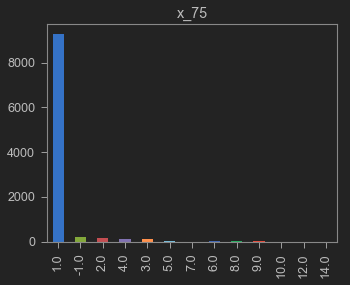

 1.0     9003
 2.0      362
-1.0      213
 4.0      140
 3.0      107
 5.0       81
 6.0       35
 7.0       18
 9.0       17
 10.0      17
 8.0        7
Name: x_76, dtype: int64


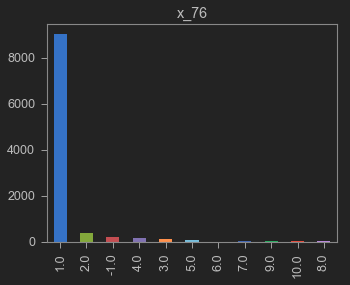

 1.0     9003
 2.0      290
-1.0      213
 4.0      172
 3.0      159
 5.0       54
 7.0       43
 6.0       28
 9.0       15
 8.0       11
 10.0       5
 11.0       3
 12.0       2
 15.0       1
 14.0       1
Name: x_77, dtype: int64


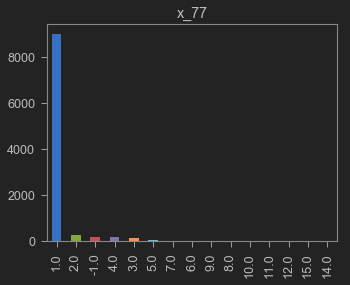

 6.0    3029
 2.0    2010
 1.0    1558
 3.0    1542
 5.0     670
 7.0     520
 4.0     381
-1.0     213
 8.0      77
Name: x_78, dtype: int64


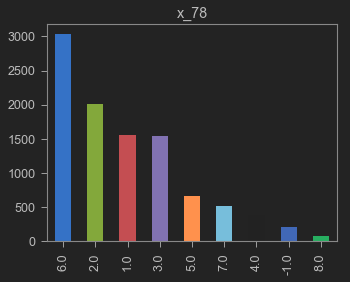

 1.0    3430
 2.0    1897
 3.0    1303
 4.0     750
 5.0     681
 6.0     540
 7.0     460
 8.0     398
 9.0     320
-1.0     214
 0.0       7
Name: x_79, dtype: int64


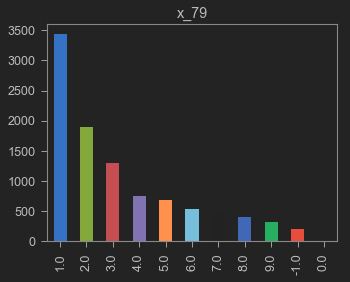

0.000000    199
0.713615    135
0.703052    134
0.707746    126
0.718310    123
0.701878    118
0.725352    118
0.708920    117
0.710094    117
0.715962    115
0.721831    112
0.730047    110
0.694836    110
0.700704    109
0.742958    109
0.720657    109
0.699531    109
0.723005    108
0.717136    108
0.732394    107
0.727700    107
0.711268    107
0.724178    106
0.714789    104
0.734742    103
0.705399    103
0.728873    101
0.693662    100
0.731221     99
0.704225     98
           ... 
0.906103      3
0.915493      3
0.919014      3
0.926056      3
0.942488      3
0.913146      3
0.921362      2
0.929577      2
0.928404      2
0.911972      2
0.900235      2
0.923709      2
0.933099      2
0.935446      1
0.937793      1
1.000000      1
0.548122      1
0.938967      1
0.916667      1
0.957746      1
0.958920      1
0.960094      1
0.974178      1
0.914319      1
0.956573      1
0.965962      1
0.963615      1
0.950704      1
0.946009      1
0.961268      1
Name: x_80, Length: 262,

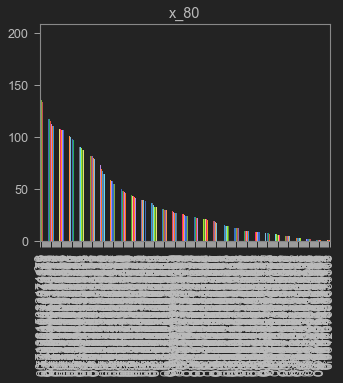

-1.000000    204
 0.970962    174
 0.882033    172
 0.896552    172
 0.927405    169
 0.912886    169
 0.949183    168
 0.894737    168
 0.952813    166
 0.967332    165
 0.929220    165
 0.909256    164
 0.892922    160
 0.885662    160
 0.954628    157
 0.918330    157
 0.898367    156
 0.878403    155
 0.874773    155
 0.876588    155
 0.936479    154
 0.911071    154
 0.934664    153
 0.965517    153
 0.921960    153
 0.916515    153
 0.932849    151
 0.947368    151
 0.872958    151
 0.938294    151
            ... 
 0.524501     11
 0.502722     11
 0.575318     11
 0.555354     11
 0.546279     11
 0.582577     11
 0.589837     11
 0.604356     11
 0.607985     11
 0.553539     11
 0.558984     10
 0.511797     10
 0.533575     10
 0.519056     10
 0.600726      9
 0.602541      9
 0.515426      9
 0.513612      8
 0.560799      8
 0.586207      7
 0.578947      7
 0.548094      6
 0.531760      4
 0.000000      1
 0.228675      1
 0.194192      1
 0.188748      1
 0.230490     

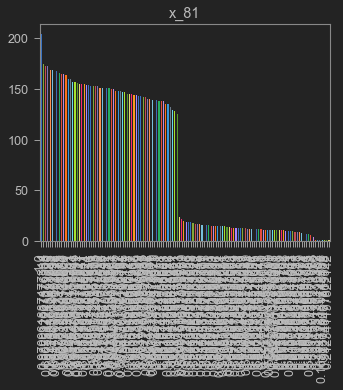

 1.0    9031
 3.0     744
 4.0     152
 5.0      44
-1.0      29
Name: x_82, dtype: int64


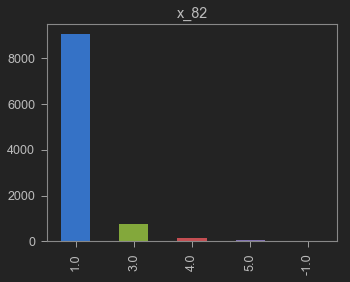

 1.0     7880
 2.0      505
 4.0      481
 5.0      365
 3.0      347
 6.0      177
 10.0      86
 7.0       72
 8.0       46
-1.0       29
 9.0       12
Name: x_83, dtype: int64


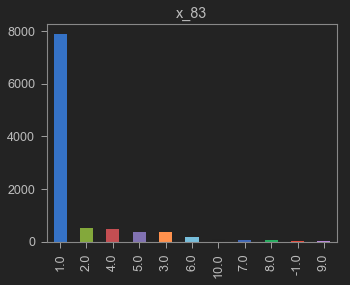

 1.0     8030
 3.0      944
 2.0      794
 4.0       90
-1.0       29
 6.0       26
 5.0       24
 11.0      14
 8.0       14
 10.0       9
 7.0        9
 9.0        6
 14.0       5
 15.0       2
 13.0       2
 12.0       2
Name: x_84, dtype: int64


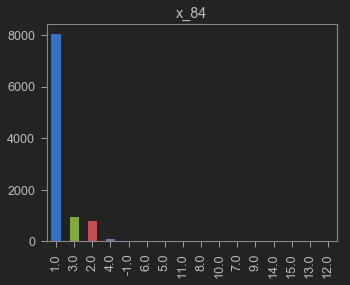

 1.0    9401
 3.0     415
 4.0     117
-1.0      29
 5.0      22
 6.0      16
Name: x_85, dtype: int64


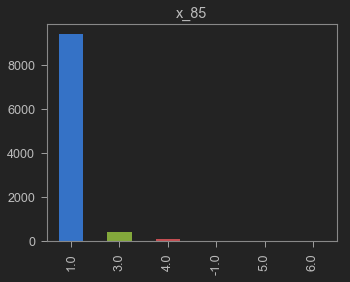

 1.0     9401
 4.0      149
 3.0      137
 5.0       97
 2.0       58
 6.0       51
 7.0       31
-1.0       29
 8.0       21
 9.0       16
 10.0      10
Name: x_86, dtype: int64


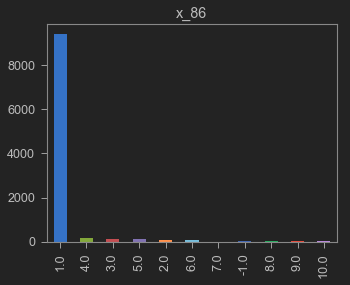

 1.0    9401
 2.0     311
 3.0     241
-1.0      29
 4.0      17
 5.0       1
Name: x_87, dtype: int64


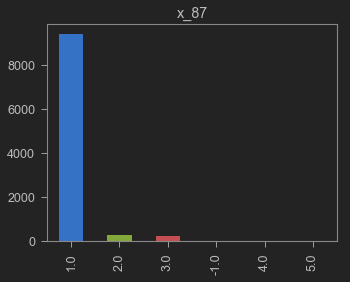

 1.0     8986
 2.0      317
 3.0      187
 4.0      103
 9.0       89
 5.0       64
 10.0      51
 8.0       49
 7.0       40
 6.0       40
-1.0       29
 12.0      15
 11.0      13
 13.0       6
 15.0       6
 14.0       5
Name: x_88, dtype: int64


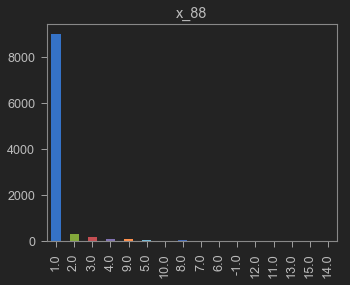

 1.0     9911
-1.0       29
 2.0       12
 8.0        9
 10.0       7
 6.0        7
 9.0        6
 7.0        6
 11.0       4
 12.0       3
 15.0       2
 14.0       2
 5.0        1
 4.0        1
Name: x_89, dtype: int64


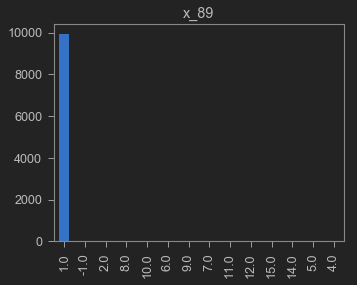

 1.0    8602
 2.0     950
 3.0     358
-1.0      90
Name: x_90, dtype: int64


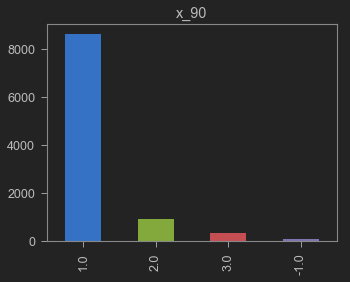

 1.0    8935
-1.0     586
 2.0     272
 5.0     128
 4.0      78
 6.0       1
Name: x_91, dtype: int64


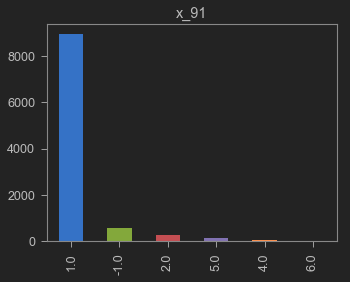

-1.000000    7366
 0.000000     318
 0.010417     284
 0.083333     244
 0.052083     216
 0.125000     169
 0.208333     145
 0.020833     125
 0.333333     108
 0.177083     106
 0.302083      79
 0.093750      79
 0.041667      61
 0.135417      56
 0.114583      52
 0.375000      49
 0.250000      42
 0.458333      42
 0.500000      41
 0.218750      39
 0.427083      36
 0.145833      26
 0.166667      26
 0.583333      25
 0.260417      24
 0.468750      19
 0.364583      19
 0.343750      18
 0.062500      17
 0.239583      15
             ... 
 0.489583       7
 0.875000       5
 0.750000       5
 0.718750       5
 0.385417       4
 0.395833       4
 0.312500       4
 0.187500       3
 0.562500       3
 0.416667       3
 0.510417       2
 0.572917       2
 0.031250       2
 0.843750       2
 0.635417       2
 0.531250       2
 0.322917       2
 0.968750       2
 0.197917       2
 0.520833       1
 0.229167       1
 0.739583       1
 0.833333       1
 0.541667       1
 0.666667 

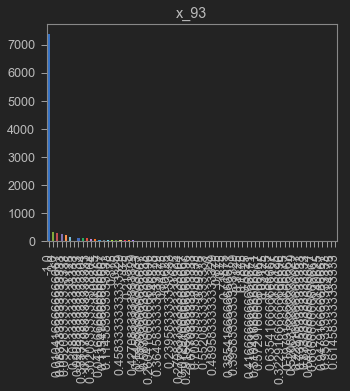

-1.000000    2446
 0.106383     277
 0.436170     215
 0.074468     211
 0.468085     209
 0.127660     208
 0.170213     189
 0.276596     154
 0.212766     147
 0.648936     144
 0.382979     144
 0.404255     140
 0.297872     136
 0.425532     134
 0.329787     133
 0.255319     132
 0.670213     132
 0.606383     131
 0.446809     123
 0.287234     117
 0.414894     115
 0.265957     113
 0.319149     113
 0.585106     111
 0.553191     111
 0.393617     110
 0.361702     109
 0.340426     109
 0.223404     108
 0.372340     108
             ... 
 0.808511      72
 0.734043      72
 0.617021      70
 0.797872      69
 0.691489      66
 0.723404      63
 0.138298      59
 0.148936      56
 0.744681      51
 0.819149      48
 0.159574      45
 0.117021      36
 0.829787      34
 0.840426      31
 0.085106      30
 0.053191      13
 0.968085      13
 0.095745      11
 0.000000      10
 0.063830      10
 0.861702       9
 0.882979       6
 0.851064       6
 0.872340       5
 0.893617 

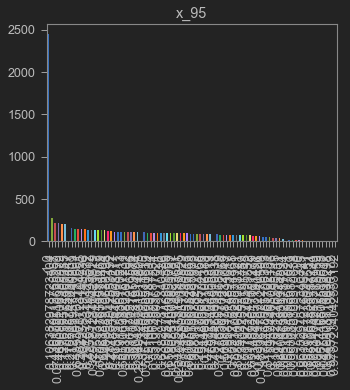

In [98]:
discrete_detect(numeric_var.columns[2:])

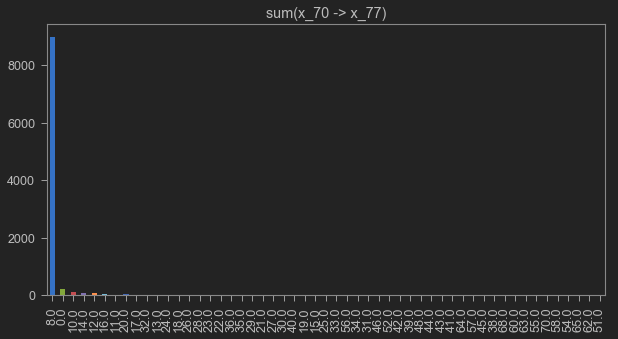

In [99]:
# pd.crosstab(train_xy["x_70"],train_xy.y)
# pd.crosstab(train_xy["x_71"],train_xy.y)
# pd.crosstab(train_xy["x_72"],train_xy.y)
# pd.crosstab(train_xy["x_73"],train_xy.y)
# pd.crosstab(train_xy["x_74"],train_xy.y)
# pd.crosstab(train_xy["x_75"],train_xy.y)
# pd.crosstab(train_xy["x_76"],train_xy.y)
# pd.crosstab(train_xy["x_77"],train_xy.y)
x_70_77_sum = train_x[["x_%s" % i for i in range(70,78)]].sum(1)
plt.figure(figsize=(10,5))
x_70_77_sum.value_counts(dropna=False).plot(kind="bar")
plt.title("sum(x_70 -> x_77)")
plt.show()

In [100]:
# train_x.drop(["x_%s" % i for i in range(70,78)],axis=1,inplace=True)
train_x["x_70to77"] = x_70_77_sum

### category var

In [ ]:
category_var = train_x.loc[:,"x_96":"x_157"].fillna(-1)

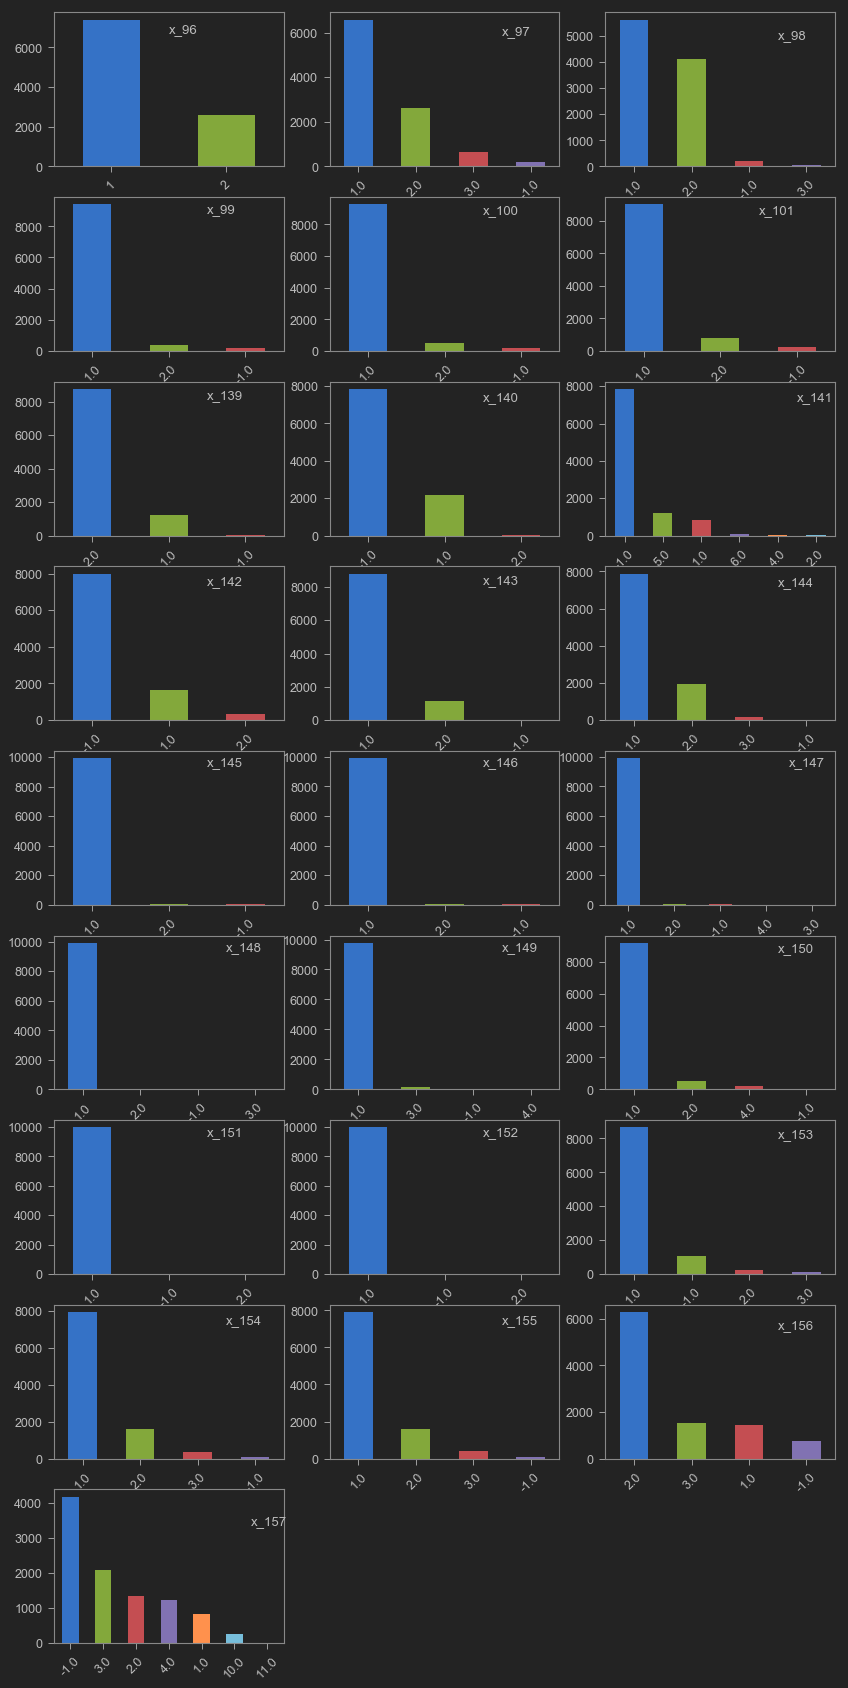

In [101]:
# X_category.replace(np.nan,-1)
ncol = 3
nrow = (len(category_var.columns) // ncol)+1
plt.figure(figsize=(14,30))
for i in range(len(category_var.columns)):
    ax = plt.subplot(nrow,ncol,i+1)
    category_var.iloc[:,i].value_counts(dropna=False).plot(kind="bar",ax=ax,rot=45)
    ax.set_ylabel("")
    ax.text(ax.get_xlim()[1]-1,ax.get_ylim()[1]-1000,str(category_var.columns[i]))

In [102]:
train_x.drop(["x_151",'x_152'],axis=1,inplace=True)

### outliers
#### continous var outliers-imputed by mean/mode/median

In [ ]:
numeric_var = train_x.loc[:,"x_1":"x_95"]

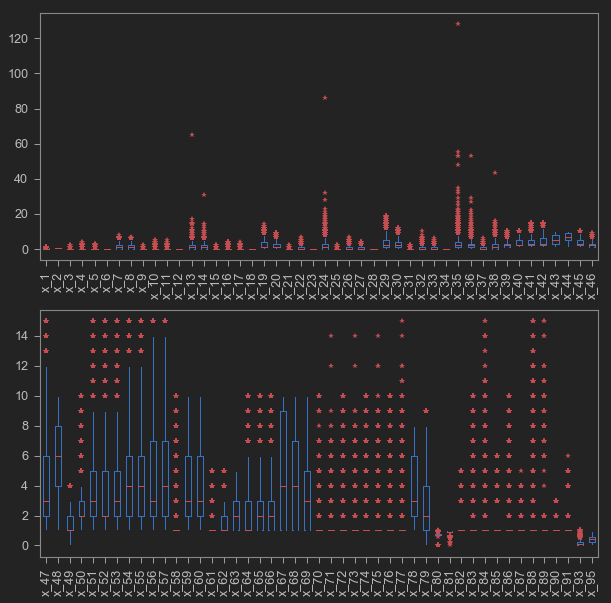

In [103]:
len_var = len(numeric_var.columns)

fig,axes = plt.subplots(2,1,figsize=(10,10))
numeric_var.iloc[:,:len_var//2].boxplot(ax=axes[0],rot=90,sym="r*",grid=False)
numeric_var.iloc[:,len_var//2:].boxplot(ax=axes[1],rot=90,sym="r*",grid=False)

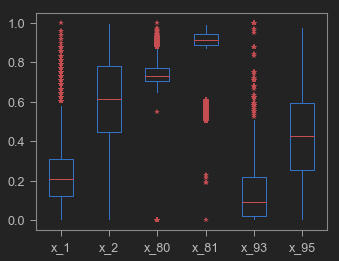

In [104]:
continous_var = ["x_1","x_2","x_80",'x_81','x_93','x_95']
numeric_var[continous_var].boxplot(sym="r*",grid=False)

In [105]:
def impute_outliers(col):
    desc = numeric_var[col].describe()
    upper = desc["75%"]+1.5*(desc["75%"]-desc["25%"])
    lower = desc["25%"]-1.5*(desc["75%"]-desc["25%"])
    outliers = numeric_var[col][(numeric_var[col]>upper)|(numeric_var[col]<lower)]
    need_values = [desc["mean"],desc["50%"],desc['25%'],desc['75%']]
    impute_values = [need_values[i] for i in [np.random.randint(3) for _ in range(len(outliers))]]
    numeric_var[col] = pd.Series(impute_values,index=outliers.index).combine_first(numeric_var[col])

for n in range(10):
    for col in continous_var:
        impute_outliers(col)

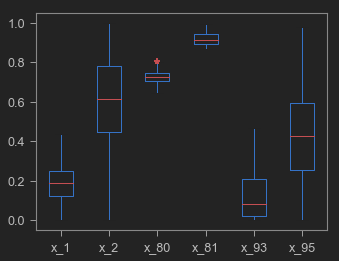

In [106]:
continous_var = ["x_1","x_2","x_80",'x_81','x_93','x_95']
numeric_var[continous_var].boxplot(sym="r*",grid=False)

#### discrete var outliers--drop

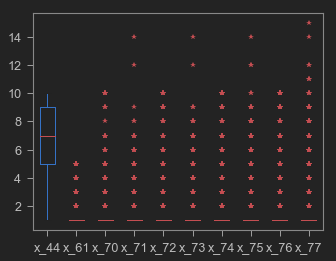

In [107]:
find_outlier_var = ['x_44']+['x_61']+['x_7%s' % i for i in range(8)]
numeric_var[find_outlier_var].boxplot(sym="r*",grid=False)

In [108]:
train_x.drop(["x_%s" % i for i in range(70,78)],axis=1,inplace=True)

## compute threshold of numeric variables:x_1-x_95
### by var threshold

In [109]:
numeric_var = train_x.loc[:,"x_1":"x_95"]
numeric_var_desc = numeric_var.describe().T[['std','mean']].assign(rate_of_std=lambda x: x["std"]/x["mean"])
cond = numeric_var_desc["std"]<0.01
col_drop = numeric_var_desc[cond]
# for col in col_drop.index:
#     print(train_xy[col].value_counts(dropna=False))
col_drop

,std,mean,rate_of_std
x_6,0.0,0.0,NaN
x_12,0.0,0.0,NaN
x_18,0.0,0.0,NaN
x_23,0.0,0.0,NaN
x_28,0.0,0.0,NaN
x_34,0.0,0.0,NaN


In [110]:
cols = col_drop.index.tolist()
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)):
        if numeric_var[cols[i]].equals(numeric_var[cols[j]]):
            print(cols[i],"==",cols[j])

x_6 == x_18
x_6 == x_28
x_12 == x_23
x_12 == x_34
x_18 == x_28
x_23 == x_34


In [111]:
train_x.drop(["x_18","x_28","x_23","x_34"],axis=1,inplace=True) 

### by corr threshold

In [112]:
corr = train_x.corr()
corr.loc[:,:] = np.tril(corr,k=-1)
corr = corr.stack()
pd.DataFrame(corr[(corr>0.95)|(corr<-0.95)],columns=["corr"])

,,corr
x_5,x_4,0.964117
x_11,x_10,0.972888
x_17,x_16,0.950531
x_25,x_15,0.970203
x_37,x_22,0.961842
x_65,x_39,0.966361
x_66,x_39,0.968892
x_155,x_154,0.979547


In [113]:
# print(train_x["x_15"].equals(train_x["x_25"]))
# print(train_x["x_21"].equals(train_x["x_31"]))
col_missing_rate[['x_5','x_4','x_10','x_11','x_15','x_21','x_25','x_31','x_39','x_65','x_66','x_155','x_154']]

x_5      0.4455
x_4      0.4455
x_10     0.4521
x_11     0.4521
x_15     0.4455
x_21     0.4521
x_25     0.4455
x_31     0.4521
x_39     0.0215
x_65     0.0213
x_66     0.0213
x_155    0.0090
x_154    0.0090
Name: col_missing_rate, dtype: float64

In [114]:
train_x.drop(['x_4','x_10','x_25','x_31','x_15',"x_39","x_154"],axis=1,inplace=True) 

# final step:feature scale and one-hot code
## feature scale

In [115]:
def continous_var_scale(cols,method="mean_std"):
    if method == "min_max":
        train_x[cols] = train_x[cols].apply(lambda x:(x-x.mean())/x.std())
    elif method == "mean_std":
        train_x[cols] = train_x[cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))
    return train_x

In [116]:
train_x = continous_var_scale(continous_var)

## one-hot code

In [117]:
# one_hot_var = {"x_3":(2,True),
#                "x_4":(4,True),
#                "x_5":(None,True),
#                "x_6":(None,True),
#                "x_7":([6],True),
#                "x_8":([5],False),
#                "x_9":(2,True),
#                "x_10":(4,True),
#                "x_11":(4,True),
#                "x_12":(None,True),
#                "x_13":([10],False), 
#                "x_14":([7.5],False),
#                "x_15":(2,True),
#                "x_16":(4,True),
#                "x_17":(4,True),
# #                "x_18":(None,True),
#                "x_19":(13,True),
#                "x_20":([-0.5,2.5,5.5,8.5],True),
#                "x_21":(2,True),
#                "x_22":([5.5],False),
# #                "x_23":(None,True),
#                "x_24":([20],False),
#                "x_25":(2,True),
#                "x_26":(6,True),
#                "x_27":(4,True),
# #                "x_28":(None,True),
#                "x_29":(16,True),
#                "x_30":([10],False),
#                "x_31":(2,True),
#                "x_32":(7,True),
#                "x_33":(5,True),
# #                "x_34":(None,True),
#                "x_35":([20],False),
#                "x_36":({},False),#改作连续var
#                "x_37":(4,True),
#                "x_38":({},False),#改作连续var
# #                "x_39":(None,True),
#                "x_40":(None,True),
#                "x_41":(None,True),
#                "x_42":(None,True),
#                "x_43":(None,True),
#                "x_44":([4],True),
#                "x_45":(None,True),
#                "x_46":(8,True),
#                "x_47":(None,True),
#                "x_48":(None,True),
#                "x_49":((0,2),True)
#               }
# one_hot_var.update(dict.fromkeys(["x_%s" % i for i in range(50,70)],(None,True))) 
# one_hot_var.update(
#                     {
# #                         "x_70":(6,True),
# #                         "x_71":(None,True),
# #                         "x_72":(6,True),
# #                         "x_73":(None,True),
# #                         "x_74":(6,True),
# #                         "x_75":(None,True),
# #                         "x_76":(6,True),
# #                         "x_77":(None,True),
#                         "x_70to77":((7.5,8.5),False),
# #                         "x_70to77":({},False),
#                         "x_78":({},False),#改作连续var
#                         "x_79":({},False),#改作连续var
#                         "x_80":([0,0.68,0.9,1],False),
#                         "x_81":([-0.5,0.75,0.96],False),
#                         "x_82":(None,True),
#                         "x_83":(None,True),
#                         "x_84":(7,True),
#                         "x_85":(None,True),
#                         "x_86":(None,True),
#                         "x_87":(4,True),
#                         "x_88":(10,True),
#                         "x_89":(2,True),
#                         "x_90":({},False),#改作连续var
#                         "x_91":({},False),#改作连续var
#                         "x_141":([0,1,3,5],True),
#                         "x_147":([1.5,4],True),
#                         "x_153":((0.5,1),True),
#                         "x_155":({},False)#改作连续var
#                     }
#                 )
# one_hot_var.update(dict.fromkeys(train_x.loc[:,"x_96":"x_157"].columns.drop(["x_141","x_147","x_153","x_155"]),(None,True)))

# def one_hot_code(col,bound=None,drop=True,train_x=train_x):
# #     train_x_cp = train_x.copy()
#     if bound is None:
#         dummy = pd.get_dummies(train_x[col],prefix=col,dummy_na=True)
    
#     elif isinstance(bound,int):
#         train_x.loc[(train_x[col]>=bound),col] = bound
#         dummy = pd.get_dummies(train_x[col],prefix=col,dummy_na=True)
    
#     elif isinstance(bound,list):
#         col_cut = pd.cut(train_x[col],bins=[float("-inf")]+bound+[float('inf')],labels=False)
#         dummy = pd.get_dummies(col_cut,prefix=col,dummy_na=True)
    
#     elif isinstance(bound,tuple):
#         col_cut = pd.cut(train_x[col],bins=list(bound),labels=False)
#         dummy = pd.get_dummies(col_cut,prefix=col,dummy_na=True)
    
#     elif isinstance(bound,dict):
#         dummy = None
    
#     if drop:
#         return dummy
#     else:
#         col_dummy = pd.concat([train_x[col].fillna(-1),dummy],axis=1)
#         return col_dummy
    

# train_x_clean = train_x[["x_1","x_2","x_93","x_95"]].apply(lambda x: x.fillna(x.mean()))
# for k,v in one_hot_var.items():
#     dummy_df = one_hot_code(k,bound=v[0],drop=v[1])
#     train_x_clean = pd.concat([dummy_df,train_x_clean],axis=1)

In [118]:
one_hot_df = pd.get_dummies(train_x.loc[:,"x_96":'x_157'].astype("object"),dummy_na=True)
train_x_clean = pd.concat([train_x['x_70to77'],train_x.loc[:,:'x_95'],one_hot_df],axis=1)

In [119]:
train_x_clean.head()

x_70to77       x_1       x_2   x_3   x_5   x_6   x_7  \
cust_group cust_id                                                         
group_3    100000        8.0  0.125000  0.659675   0.0   1.0   0.0   3.0   
           100001        8.0  0.250000  0.657454   0.0   0.0   0.0   0.0   
           100002        8.0  0.604167  0.825764   0.0   0.0   0.0   3.0   
           100003        8.0  0.312500  0.473441   0.0   0.0   0.0   0.0   
           100004       12.0  0.458333  0.344635  99.0  99.0  99.0  99.0   

                     x_8   x_9  x_11    ...      x_156_2.0  x_156_3.0  \
cust_group cust_id                      ...                             
group_3    100000    3.0   0.0   1.0    ...              1          0   
           100001    0.0   0.0   0.0    ...              1          0   
           100002    3.0   0.0   0.0    ...              1          0   
           100003    0.0   0.0   1.0    ...              1          0   
           100004   99.0  99.0  99.0    ...              1          0   

                    x_156_nan  x_157_1.0  x_157_2.0  x_157_3.0  x_157_4.0  \
cust_group cust_id                                                          
group_3    100000           0          0          1          0          0   
           100001           0          0          0          0          0   
           100002           0          0          0          0          0   
           100003           0          0          1          0          0   
           100004           0          1          0          0          0   

                    x_157_10.0  x_157_11.0  x_157_nan  
cust_group cust_id                                     
group_3    100000            0           0          0  
           100001            0           0          1  
           100002            0           0          1  
           100003            0           0          0  
           100004            0           0          0  

[5 rows x 160 columns]

In [120]:
train_x_clean.to_csv("./another data/train_x_clean.csv")

In [121]:
import re
from functools import reduce
regex = re.compile(r"^x_\d{1,3}")
train_data_nolabel_dummies = pd.Series(reduce(lambda x,y:x+y,train_x_clean.columns.str.findall(regex))).value_counts()#.plot(kind="bar")
train_data_nolabel_dummies.to_excel("./another data/train_data_nolabel_dummies.xlsx")

In [122]:
train_x.to_csv("./another data/train_x.csv")